In [13]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.text as text

## Linear regression

In this notebook we will consider a simple linear regression model:

$$ y_i = x_{ij} w_j + b$$

We will be using the "summation conventions": when an index is repeated the summation over this index is implied:

$$ 
x_{ij} w_j \equiv   \sum_j x_{ij} w_j 
$$

#### Problem 1

Implement function `linear(x,w,b)` that given feature matrix $\mathbf{x}$, weights $\mathbf{w}$ and bias $b$  returns $\mathbf{y}$. **Hint** Use matrix multiplication operator `@`.

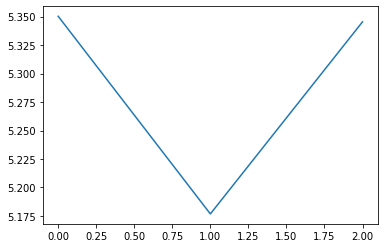

In [14]:
def linear(x,w,b):
    y = x@w + b
    return y

a = np.random.rand(3, 2)
b = np.random.rand(2)
y=linear(a, b, 5)
plt.plot(y)
plt.show()

### Data

#### Problem 2

Generate a random feature matrix $\mathbf{x}$ witch 10000 samples and three features, such that first feature is drawn from normal distribution $\mathcal{N}(0,1)$, second feature from  uniform distribution on interval $[0,1)$ and third from $\mathcal{N}(1,2)$, where 
$N(\mu,\sigma)$ denotes normal distribution with mean $\mu$ and standard deviation $\sigma$. To generate random numbers you can use `numpy.random.normal` and `numpy.random.uniform` functions. To collect all features together you can use `numpy.stack` function.

Then using $\mathbf{x}$, weights $w_{true}$  and  bias $b_{true}$:

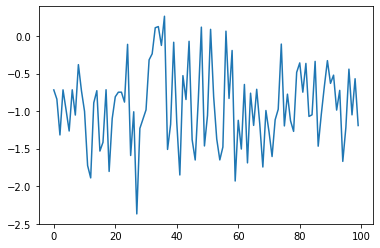

In [15]:
N=100
normal=np.random.normal(0, 1, N)
uniform=np.random.uniform(0, 1, N)
onetwo=np.random.normal(1, 2, N)
x=np.stack((normal, uniform, onetwo), axis=-1)

w_true = np.array([0.2, 0.5,-0.2])
b_true = -1

y=linear(x, w_true, b_true)

noise=np.random.normal(0, 0.1, N)
y=np.add(y, noise)

plt.plot(y)
plt.show()

generate output $\mathbf{y}$ assuming a normaly distributed $\mathcal{N}(0,0.1)$ noise $\mathbf{\epsilon}$.

$$ y_i =  
x_{ij} w_j+b +\epsilon_i 
$$

### Loss

#### Problem 3

Given the means square loss

$$ MSE(w,b|y,x) = \frac{1}{2}\frac{1}{N}\sum_{i=0}^{N-1} (y_i -  x_{ij} w_j -b  )^2$$

write down the python function `mse(y,x,w,b)` implementing it:

In [16]:
def mse(y,x,w,b):
    Sum = 0
    for i in range(0, N):
        Sum += ((y[i]-(x[i]@w)-b)**2)
    return (1/(2*N))*Sum

### Gradient

and implement functions `grad_w(y,x,w,b)` and `grad_b(y,x,w,b)` implementing those gradients.

In [17]:
def grad_w(y,x,w,b):
    return -(1/N)*(y@x-x.transpose()@x@w-b*sum(x))
    
def grad_b(y,x,w,b):
    return -(1/N)*(sum(y)-x@w-b*N)

### Gradient descent

#### Problem 4

Implement gradient descent for linear regression. Start from

In [18]:
w = np.asarray([0.0,0.0,0.0], dtype='float64')
b = 1.0
epochs = 1000
alpha = 0.2

def gradientDescent(x, y):
    global w
    global b
    print(epochs)
    for e in range(epochs):
        gradW = alpha*grad_w(y,x,w,b)
        gradB = alpha*grad_b(y,x,w,b)
        
        w -= gradW
        b -= gradB[0]
        
        mseValue = mse(y, x, w, b)
        # print(e, mseValue)
        if (mseValue < 0.0055):
            print('We need ', e, ' epochs')
            break
    
    if(e==epochs):
        print('not found')
        
gradientDescent(x, y)
print(w_true, b_true)
print (w, b)

1000
We need  51  epochs
[ 0.2  0.5 -0.2] -1
[ 0.19274774  0.31188372 -0.20135361] -0.9292626399793572


How many epochs did you need to get MSE below 0.0075 ?

### Pytorch

#### Problem 5

Implement gradient descent using pytorch. Start by just rewritting Problem 4 to use torch Tensors instead of numpy arrays.

To convert frrom numpy arrays to torch tensors you can use ``torch.from_numpy()`` function:

In [19]:
import torch as t 

In [20]:
t_y = t.from_numpy(y)
t_x = t.from_numpy(x)
t_w = t.DoubleTensor([0,0,0])
t_b = t.DoubleTensor([1.0])

Then use the automatic differentiation capabilities of Pytorch. To this end the variable with respect to which the gradient will be calculated, `t_w` and `t_b` in this case, must have attribute
`requires_grad` set to `True`.

In [21]:
print(t_w.requires_grad)
print(t_b.requires_grad)
t_w.requires_grad = True
t_b.requires_grad = True

False
False


The torch will automatically track any expression containing `t_w` and `t_b` and store its computational graph. The method `backward()` can be run on the final expression to back propagate the gradient. The gradient is then accesible as `t_w.grad`.

In [22]:
t_w

tensor([0., 0., 0.], dtype=torch.float64, requires_grad=True)

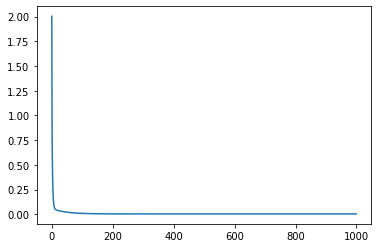

In [23]:
descent = []
for e in range(epochs): 
    # czy istnieje gradient i go wyzerowac
    if not ( t_w.grad is None):
        t_w.grad.data.zero_()
    if not ( t_b.grad is None):
        t_b.grad.data.zero_()
    
    z=t.matmul(t_x, t_w)+t_b
    loss = 0.5*t.mean((t_y-z)**2)
    loss.backward()
    # print(loss)
    
    # print(t_w.grad)
    
    t_w.data = t.sub(t_w.data, t_w.grad, alpha=alpha)
    t_b.data = t.sub(t_b.data, t_b.grad, alpha=alpha)
    
    # to anable access to .grad for next backward()     
    # t_w.retain_grad()
    # t_b.retain_grad()
    
    descent.append(loss.item())
    
plt.plot(descent)
plt.show()
    

Finally use  Pytorch  optimisers.

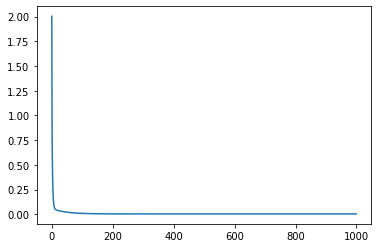

In [24]:
t_w = t.DoubleTensor([0,0,0])
t_b = t.DoubleTensor([1.0])
t_w.requires_grad = True
t_b.requires_grad = True
descent2 = []
optimizer = t.optim.SGD([t_w, t_b], lr=alpha)

for e in range(epochs):      
    z=t.matmul(t_x, t_w)+t_b
    loss = 0.5*t.mean((t_y-z)**2)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    descent2.append(loss.item())
    
plt.plot(descent2)
plt.show()